<center><h1>How to classify by using of specific classes of cifar-100? </h1></center>

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation
import matplotlib.pyplot as plt
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from keras.datasets import cifar100

# preparing Dataset 

In [ ]:
(x_train,y_train),(x_test, y_test)=cifar100.load_data()

In [ ]:
os.mkdir('images')
os.mkdir('images\\train')
os.mkdir('images\\validation')

# Classes:  0 = apple, 13= bus, 36=hamster, 57 = pear, 73 = shark

In [ ]:
for i in range(100):
    if i==0 or i==13 or i==36 or i==57 or i==73 :
        path=os.path.join('images\\train',str(i))
        os.mkdir(path)
        path=os.path.join('images\\validation',str(i))
        os.mkdir(path)

# train folder

In [ ]:
import matplotlib.pyplot as plt
for i in range(500):
    if int(y_train[i])==0:
        path='images/train/0/'+str(i)+'.png'
        plt.imsave(path,x_train[i])
    if int(y_train[i])==13:
        path='images/train/13/'+str(i)+'.png'
        plt.imsave(path,x_train[i])
    if int(y_train[i])==36:
        path='images/train/36/'+str(i)+'.png'
        plt.imsave(path,x_train[i])
    if int(y_train[i])==57:
        path='images/train/57/'+str(i)+'.png'
        plt.imsave(path,x_train[i])
    if int(y_train[i])==73:
        path='images/train/73/'+str(i)+'.png'
        plt.imsave(path,x_train[i]) 

# validation folder

In [ ]:
for i in range(100):
    if int(y_test[i])==0:
        path='images/validation/0/'+str(i)+'.png'
        plt.imsave(path,x_test[i])
    if int(y_test[i])==13:
        path='images/validation/13/'+str(i)+'.png'
        plt.imsave(path,x_test[i])
    if int(y_test[i])==36:
        path='images/validation/36/'+str(i)+'.png'
        plt.imsave(path,x_test[i])
    if int(y_test[i])==57:
        path='images/validation/57/'+str(i)+'.png'
        plt.imsave(path,x_test[i])
    if int(y_test[i])==73:
        path='images/validation/73/'+str(i)+'.png'
        plt.imsave(path,x_test[i])

# Training Dataset

In [3]:
train_dir = './images/train'
validation_dir = './images/validation'

In [4]:
from keras import layers
from keras import models
from keras import optimizers

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', input_shape=(32, 32, 3)))
model.add(layers.Activation('relu')) # this is just different syntax for specifying the activation function
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#padding='valid'
model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(256))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])#RMSprop(lr=1e-4)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxP

In [6]:
from keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(32, 32),
        #No. of images to be yielded from the generator per batch.
        batch_size=20,
        # Since we use binary_crossentropy loss, 
        #we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(32, 32),
        batch_size=20,
        class_mode='categorical')

Found 2000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [7]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=200,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
200/200 [==============================] - 5s 26ms/step - loss: 1.2375 - acc: 0.4730 - val_loss: 1.0272 - val_acc: 0.6000
Epoch 2/30
200/200 [==============================] - 2s 10ms/step - loss: 0.9500 - acc: 0.6128 - val_loss: 0.8442 - val_acc: 0.6940
Epoch 3/30
200/200 [==============================] - 2s 9ms/step - loss: 0.8377 - acc: 0.6645 - val_loss: 0.7708 - val_acc: 0.7020
Epoch 4/30
200/200 [==============================] - 2s 9ms/step - loss: 0.7786 - acc: 0.6958 - val_loss: 0.7495 - val_acc: 0.7300
Epoch 5/30
200/200 [==============================] - 2s 9ms/step - loss: 0.7203 - acc: 0.7165 - val_loss: 0.7443 - val_acc: 0.7280
Epoch 6/30
200/200 [==============================] - 2s 9ms/step - loss: 0.6825 - acc: 0.7358 - val_loss: 0.6516 - val_acc: 0.7560
Epoch 7/30
200/200 [==============================] - 2s 9ms/step - loss: 0.6418 - acc: 0.7525 - val_loss: 0.6335 - val_acc: 0.7720
Epoch 8/30
200/200 [======

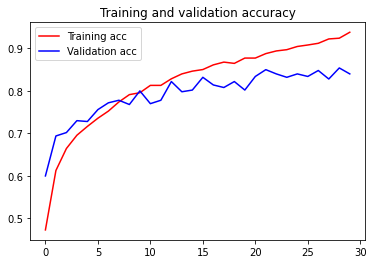

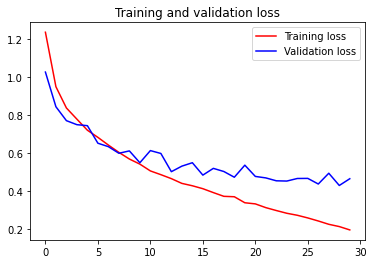

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r-', label='Training acc')
plt.plot(epochs, val_acc, 'b-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r-', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Test and Confusion Matrix

In [9]:
test_path = './images/test'

In [10]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [11]:
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(32, 32),
        batch_size=5,
        class_mode='categorical',
        shuffle=False)

class_labels = test_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())


nb_validation_samples = 495
batch_size = 5
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(test_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

#print('Confusion Matrix')
#print(confusion_matrix(test_generator.classes, y_pred))
print("\n\n")
print('Classification Report\n')
target_names = ['apple', 'bus', 'hamster', 'pear', 'shark']  #list(class_labels.values())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Found 500 images belonging to 5 classes.



Classification Report

              precision    recall  f1-score   support

       apple       0.75      0.86      0.80       100
         bus       0.95      0.88      0.91       100
     hamster       0.79      0.91      0.85       100
        pear       0.74      0.65      0.69       100
       shark       0.98      0.87      0.92       100

    accuracy                           0.83       500
   macro avg       0.84      0.83      0.83       500
weighted avg       0.84      0.83      0.83       500



In [13]:
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [14]:
cm = confusion_matrix(test_generator.classes, y_pred)
np.set_printoptions(precision=2)

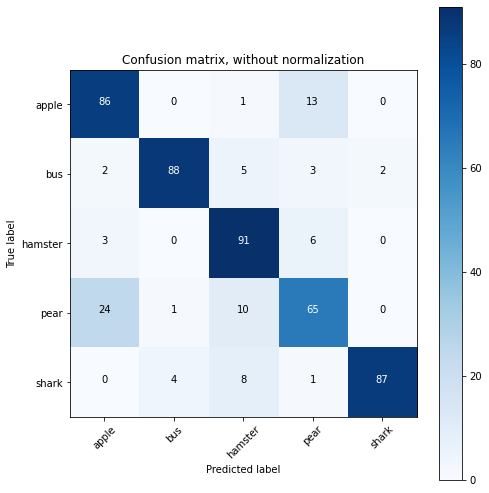

In [15]:
plt.figure(figsize=(7,7))
plot_confusion_matrix(cm, classes=target_names,
                      title='Confusion matrix, without normalization')

In [22]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 32, 32, 3)
labels batch shape: (20, 5)


In [ ]:
"""# plot first few images
for i in range(3):
    plt.subplot(330 + 1 + i)
    plt.imshow(data_batch[i], cmap=plt.get_cmap('gray'))
plt.show()"""